# Ensemble learning models- Decision Tree regressor and Random Forest regrssor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('austin_final.csv')

In [3]:
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].astype(int)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1319 non-null   int64  
 1   TempHighF                  1319 non-null   int64  
 2   TempAvgF                   1319 non-null   int64  
 3   TempLowF                   1319 non-null   int64  
 4   DewPointHighF              1319 non-null   float64
 5   DewPointAvgF               1319 non-null   float64
 6   DewPointLowF               1319 non-null   float64
 7   HumidityHighPercent        1319 non-null   float64
 8   HumidityAvgPercent         1319 non-null   float64
 9   HumidityLowPercent         1319 non-null   float64
 10  SeaLevelPressureAvgInches  1319 non-null   float64
 11  VisibilityHighMiles        1319 non-null   float64
 12  VisibilityAvgMiles         1319 non-null   float64
 13  VisibilityLowMiles         1319 non-null   float

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#3 If require perform data preprocessing.
rev_null=['TempHighF','TempAvgF','TempLowF','DewPointHighF','DewPointAvgF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureAvgInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH','WindGustMPH']
data[rev_null]=data[rev_null].replace({np.nan:data['TempHighF'].mean(),
                                       np.nan:data['TempAvgF'].mean(),
                                       np.nan:data['TempLowF'].mean(),
                                       np.nan:data['DewPointHighF'].mean(),
                                       np.nan:data['DewPointAvgF'].mean(),
                                       np.nan:data['HumidityHighPercent'].mean(),
                                       np.nan:data['HumidityAvgPercent'].mean(),
                                       np.nan:data['HumidityLowPercent'].mean(),
                                       np.nan:data['SeaLevelPressureAvgInches'].mean(),
                                       np.nan:data['VisibilityHighMiles'].mean(),
                                       np.nan:data['VisibilityAvgMiles'].mean(),
                                       np.nan:data['VisibilityLowMiles'].mean(),
                                       np.nan:data['WindHighMPH'].mean(),
                                       np.nan:data['WindGustMPH'].mean(),
                                       np.nan:data['PrecipitationSumInches'].mode()})

In [6]:
 #Split dataset into test and train (20:80).
from sklearn.model_selection import train_test_split
#array = data.values
#X = array[:,0:14]
#y = array[:,14]

X=data.drop(['PrecipitationSumInches'],axis=1).values
y=data['PrecipitationSumInches'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Voting

cart1 -161.519 (11.414)
cart2 -152.596 (11.271)
cart3 -142.378 (10.900)
cart4 -140.086 (12.469)
cart5 -137.788 (12.137)
voting -136.377 (11.271)


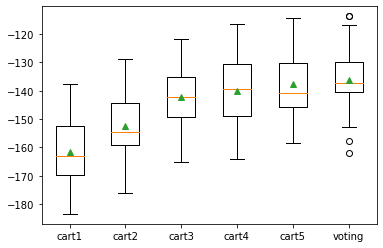

In [8]:
#for Regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot

# get the dataset
def get_data():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
    models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
    models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
    models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
    models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
    # define the voting ensemble
    ensemble = VotingRegressor(estimators=models)
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['cart1'] = DecisionTreeRegressor(max_depth=1)
    models['cart2'] = DecisionTreeRegressor(max_depth=2)
    models['cart3'] = DecisionTreeRegressor(max_depth=3)
    models['cart4'] = DecisionTreeRegressor(max_depth=4)
    models['cart5'] = DecisionTreeRegressor(max_depth=5)
    models['voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_data()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Bagging

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [10]:
X=data.drop(['PrecipitationSumInches'],axis=1).values
y=data['PrecipitationSumInches'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (1055, 17)
Shape of X_test :  (264, 17)
Shape of Y_train:  (1055,)
Shape of Y_test :  (264,)


In [12]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

In [13]:
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(Y_train,dt_pred_train,average='micro',pos_label=1))

Training Set Evaluation F1-Score:  1.0


In [14]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(Y_test,dt_pred_test,average='micro',pos_label=1),3))

Testing Set Evaluation F1-Score:  0.97


In [15]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(Y_train,rfc_pred_train,average='micro',pos_label=1))

Training Set Evaluation F1-Score:  1.0


In [16]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(Y_test,rfc_pred_test,average='micro',pos_label=1),3))

Testing Set Evaluation F1-Score:  0.981


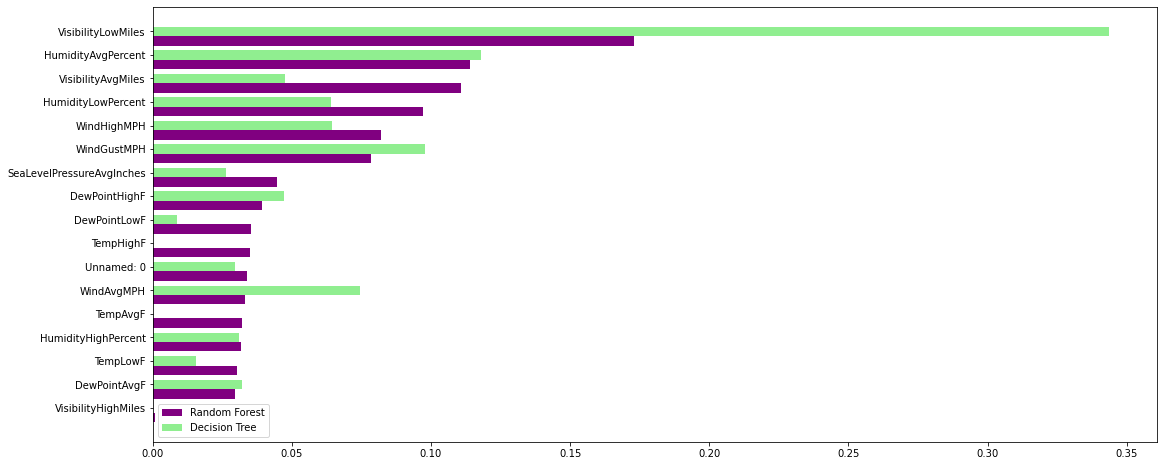

In [17]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=data.drop(columns=['PrecipitationSumInches']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()

# Boosting

In [19]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9734848484848485